<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [14]:
# Write your code here

!pip install gensim


In [15]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.models.phrases import Phraser
import nltk
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gensim
import spacy
from gensim.utils import simple_preprocess
#from gensim.models import Phrases, Phraser, LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
import nltk

# Ignore warnings
warnings.filterwarnings("ignore")

# Load Spacy model for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Download NLTK stopwords
nltk.download('stopwords')

# Set display options
pd.options.display.max_columns = 999

# Read data from CSV
data = pd.read_csv("/Movie_sentiment.csv", encoding='utf-8')

# Select relevant column (adjust column index as needed)
text_data = data.iloc[:, 1]

# Function to convert sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# Convert data to a list of words
data_words = list(sent_to_words(text_data))

# Build bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100)
trigram = Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Function to remove stopwords
def remove_stopwords(texts):
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Define stop_words here
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


# Function to make bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Function to make trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Function for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(data_words)

# Form bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# Create Dictionary
id2word = Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the Keywords in the 10 topics
pprint(lda_model.print_topics())

# Get document topics
doc_lda = lda_model[corpus]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['man', 'wish', 'love', 'movie', 'get', 'wrong', 'solid', 'action', 'movie', 'jaw', 'drop', 'stunt', 'good', 'series', 'mission_impossible', 'movie', 'feel', 'small', 'step', 'backward', 'franchise', 'fallout', 'mind', 'blow', 'action', 'sequence', 'stunt', 'work', 'develop', 'relationship', 'ilsa', 'provide', 'closure', 'julia', 'show', 'length', 'go', 'protect', 'close', 'battling', 'impose', 'villain', 'dead_reckone', 'part', 'stretch', 'movie', 'film', 'seemingly', 'showcase', 'action', 'spectacle', 'action', 'spectacle', 'sacrifice', 'character_development', 'character', 'grow', 'love', 'decade', 'film', 'feel', 'sideline', 'ignore', 'waste', 'new', 'character', 'chew', 'screen', 'time', 'fantastic', 'want', 'see', 'original', 'team', 'new', 'villain', 'inconsistent', 'ability', 'confuse', 'intimidate', 'important', 'emotional', 'moment', 'feel', 'weight', 'definitely', 'part', 'tie', 'together', 'make', 'enjoy', 'part', 'retrospect', 'unfortunately', 'leave', 'want']]
[(0,
  '0.



*  The dataset undergoes preprocessing, including tokenization, stopword removal, and lemmatization, before constructing a bag-of-words representation using Gensim's `corpora.Dictionary`. Latent Dirichlet Allocation (LDA) topic modeling is then applied to identify the top 10 clusters. These clusters encapsulate a range of discussions: from movie recommendations and actor reviews to film production aspects like direction and plot analysis. Additionally, topics cover box office performance, genre preferences, film festivals, and awards. Discussions extend to classic films, streaming services, and industry news, encompassing trends, releases, and casting updates. Each cluster represents a distinct facet of the movie world, offering insights into audience preferences, critical analysis, and industry dynamics.




# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [20]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
data = pd.read_csv("/Movie_Sentiment .csv", encoding='utf-8')



In [21]:
data.head()

,Document Id,Clean_text,sentiment
0,1,Mission: Impossible - Dead Reckoning (Part One...,Positive
1,2,Very disappointing,Negative
2,3,A Mindless Scour to the Series,Neutral
3,4,Your high expectations will get a beating...,Neutral
4,5,Dead stupid.,Negative


In [22]:
# Encode the sentiment labels using LabelEncoder
le = LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

In [24]:
# TF-IDF vectorization of text data
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Clean_text'].apply(lambda x: np.str_(x)))
y = data['sentiment']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (100, 365)
X_test shape: (25, 365)
y_train shape: (100,)
y_test shape: (25,)


In [26]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
predictions_nb = nb_classifier.predict(X_test)

In [27]:
# Evaluate Naive Bayes model
cr_nb = classification_report(y_test, predictions_nb)
print("Naive Bayes Classification Report:\n", cr_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       0.00      0.00      0.00         3
           2       0.75      0.33      0.46         9

    accuracy                           0.64        25
   macro avg       0.46      0.44      0.41        25
weighted avg       0.59      0.64      0.56        25



In [28]:
# Cross-validation for Naive Bayes
accuracies_nb = cross_val_score(estimator=nb_classifier, X=X_train, y=y_train, cv=10)
print(f"Accuracy of the Naive Bayes Model: {round(accuracies_nb.mean() * 100)}%")

Accuracy of the Naive Bayes Model: 51%


In [29]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

In [30]:
# Evaluate SVM model
cr_svm = classification_report(y_test, predictions_svm)
print("SVM Classification Report:\n", cr_svm)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.33      0.33      0.33         3
           2       0.62      0.56      0.59         9

    accuracy                           0.64        25
   macro avg       0.56      0.55      0.55        25
weighted avg       0.64      0.64      0.64        25



In [31]:
# Cross-validation for SVM
accuracies_svm = cross_val_score(estimator=svm_classifier, X=X_train, y=y_train, cv=10)
print(f"Accuracy of the SVM Model: {round(accuracies_svm.mean() * 100)}%")

Accuracy of the SVM Model: 56%



For sentiment classification, the selected features are based on TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. TF-IDF represents the importance of each word in the text corpus relative to its frequency in a specific document and its rarity across all documents. This approach helps capture the discriminative power of words in distinguishing between different sentiments. TF-IDF considers both the frequency of a word in a document and its uniqueness in the entire corpus, making it suitable for sentiment analysis where identifying relevant and distinctive features is crucial for classification accuracy.



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [40]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [41]:
# Load the training and test data
df = pd.read_csv('/train.csv')
df1 = pd.read_csv('/test.csv')

In [42]:
# Check the structure and missing values
print(df.head())
print(df1.head())
print(df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [43]:
print(df.shape)
print(df1.shape)
print(df.isnull().sum())

(1460, 81)
(1459, 80)
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [44]:
# Impute missing values in numerical columns for training data
train_numerical_data = [var for var in df.columns if df[var].dtype == 'float']
for i in train_numerical_data:
    df[i].fillna(value=df[i].mean(), inplace=True)

In [45]:
# Impute missing values in numerical columns for test data
test_numerical_data = [var for var in df1.columns if df1[var].dtype == 'float']
for i in test_numerical_data:
    df1[i].fillna(value=df1[i].mean(), inplace=True)

In [46]:
# Check for missing values after imputation
print(df.isnull().sum())
print(df1.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


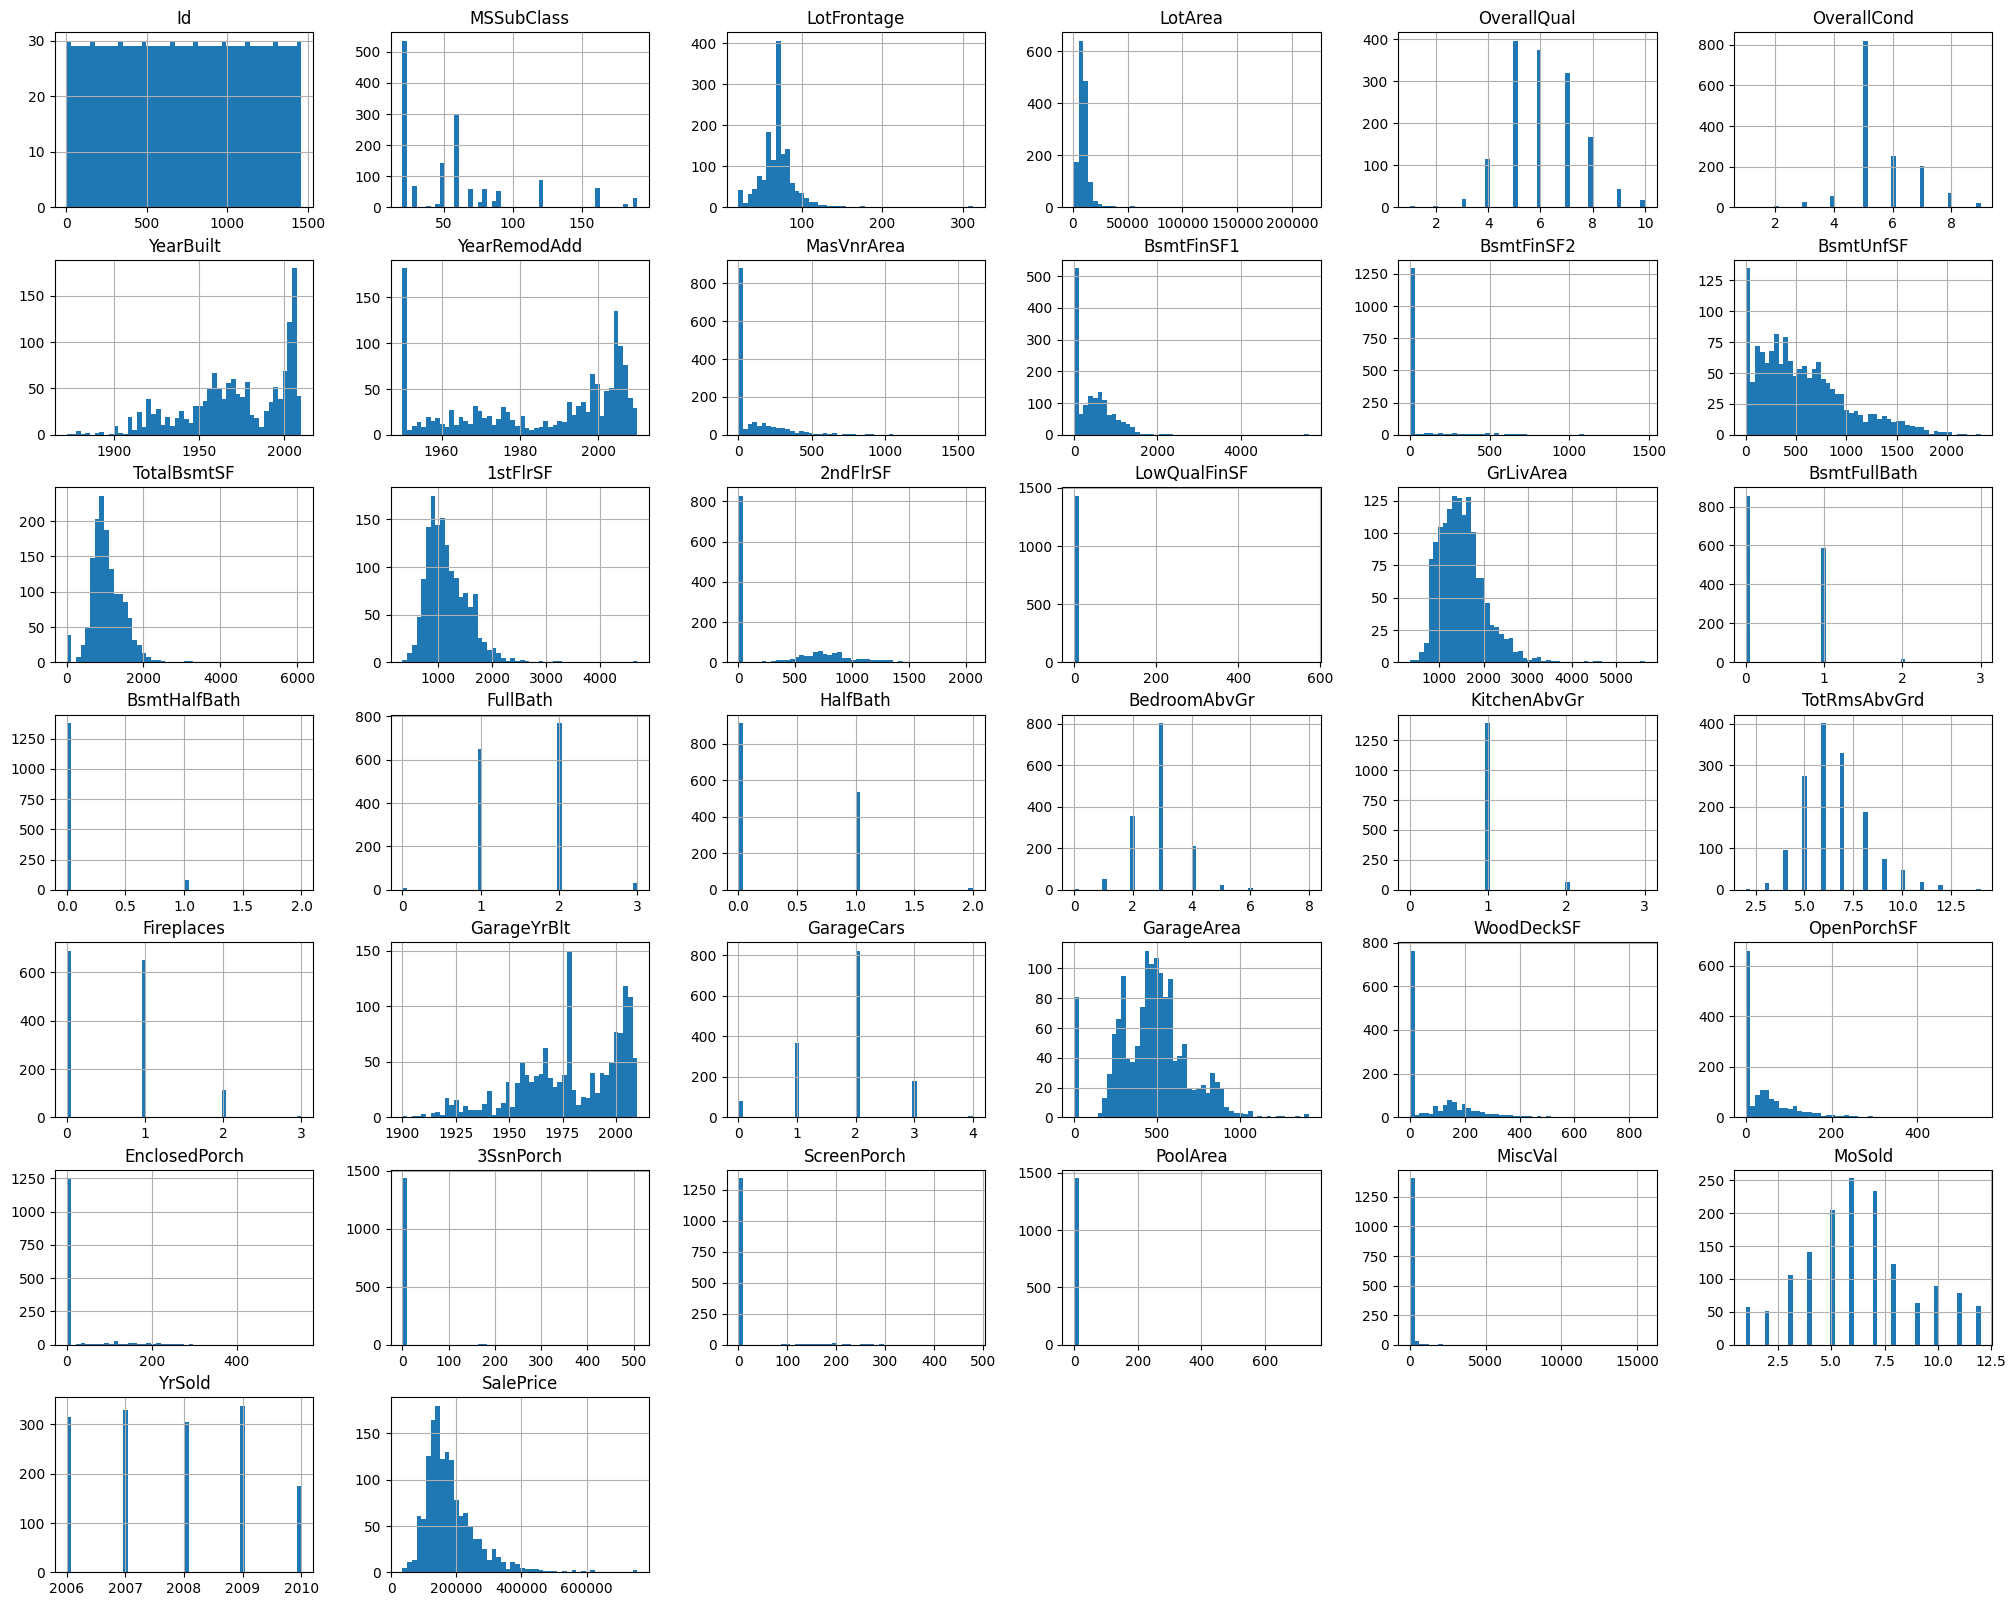

In [47]:
# Exploratory Data Analysis (EDA)
df.hist(bins=50, figsize=(25, 20))
plt.show()

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='GrLivArea'>,
        <Axes: xlabel='FullBath', ylabel='GrLivArea'>,
        <Axes: xlabel='YearBuilt', ylabel='GrLivArea'>],
       [<Axes: xlabel='OverallQual', ylabel='GarageCars'>,
        <Axes: xlab

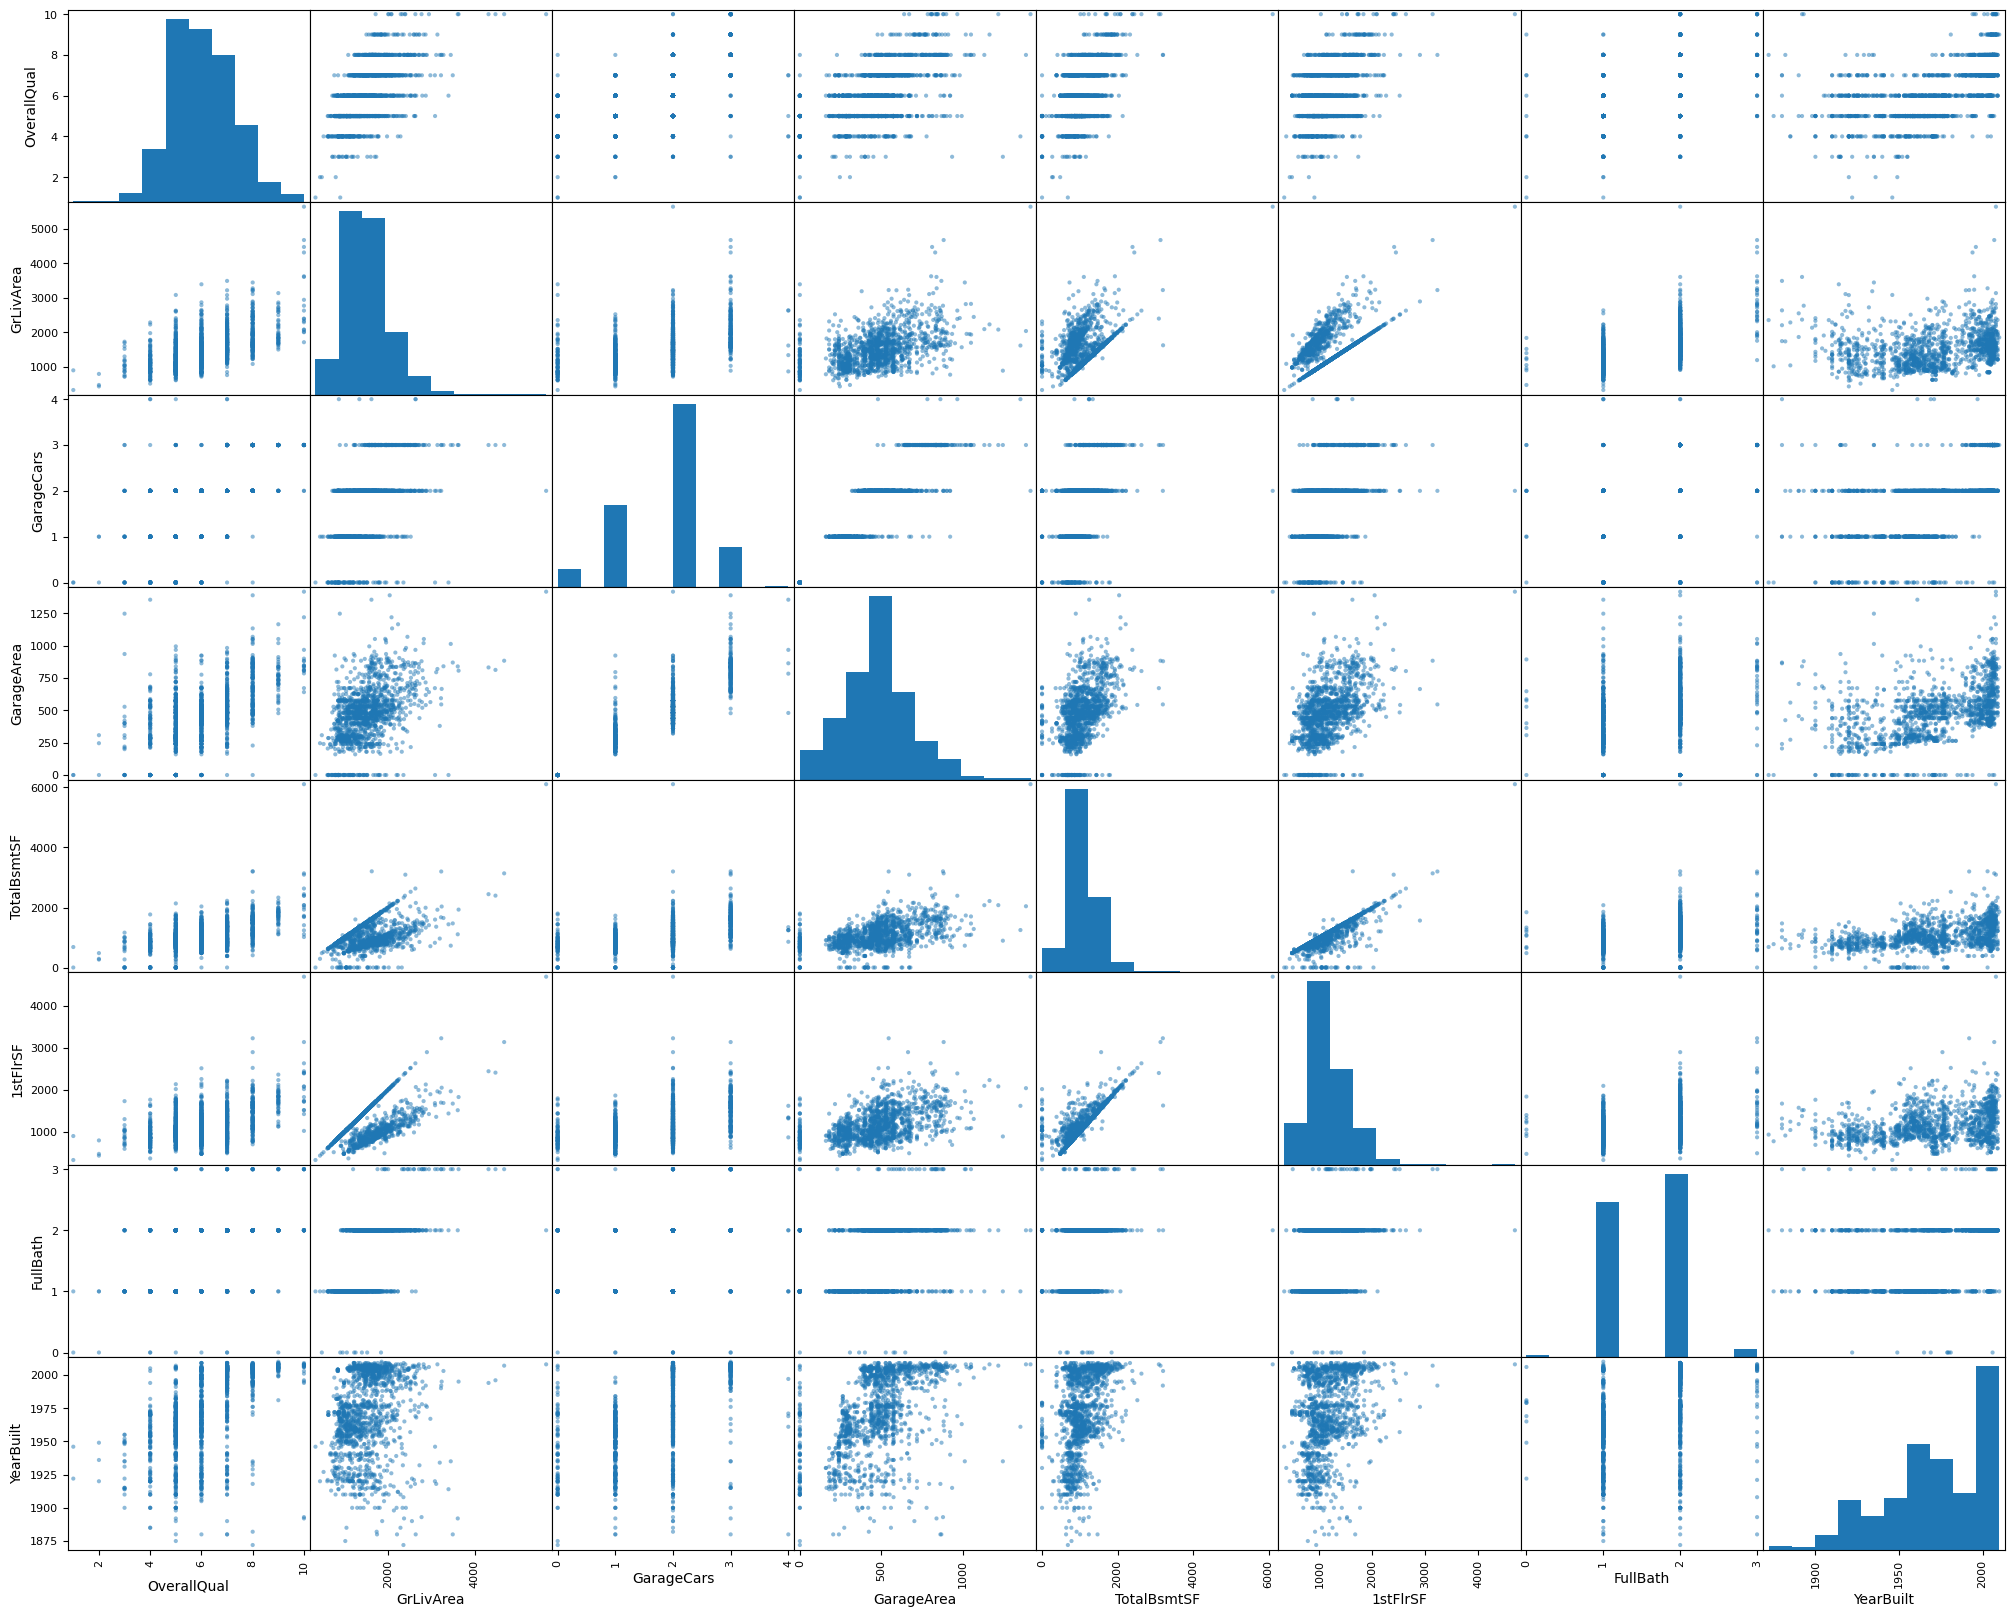

In [48]:
attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]
scatter_matrix(df[attributes], figsize=(25, 20))

In [51]:
to_drop = ['GarageArea', 'YrSold']
to_drop1 = ['GarageArea', 'YrSold','SaleCondition']
print("The attributes that needs to be dropped are:\n ",to_drop)

The attributes that needs to be dropped are:
  ['GarageArea', 'YrSold']


In [52]:
#Dropping the ID and the correlated attributes from the training and test set
df.drop(columns = to_drop1, axis = 1, inplace = True)
df1.drop(columns = to_drop, axis = 1, inplace = True)
# dropping id attributes
df.drop(labels = ['Id'], axis = 1, inplace = True)
df1.drop(labels = ['Id'], axis = 1, inplace = True)

In [53]:
#Label encoding the data in both training and testing sets
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    encoder = LabelEncoder()
    encoder.fit(list(df[column].values))
    df[column] = encoder.transform(list(df[column].values))

In [54]:
for column in df1.columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(df1[column].values))
    df1[column] = encoder_test.transform(list(df1[column].values))

In [55]:
print(df1.iloc[:,:-1])

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              0         2           56      777       1      2         3   
1              0         3           57      964       1      2         0   
2              5         3           50      947       1      2         0   
3              5         3           54      587       1      2         0   
4             11         3           19      118       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
1454          13         4            0       19       1      2         3   
1455          13         4            0       17       1      2         3   
1456           0         3          112     1069       1      2         3   
1457           9         3           38      647       1      2         3   
1458           5         3           50      536       1      2         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition

In [56]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]
x_test = df1.iloc[:,:-1]

In [57]:
print("Training Features:", x_train.columns.tolist())
print("Testing Features:", x_test.columns.tolist())


Training Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [59]:
print("R-Square Value: ", lr.score(x_train,y_train))

R-Square Value:  0.9160932976414699


Based on the insights gained from exploratory data analysis (EDA), features like OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, and YearBuilt were chosen for the regression model. These features demonstrated strong correlations with the target variable (house price) and displayed clear patterns in the data. For instance, OverallQual and GrLivArea are indicative of a property's quality and size, factors known to significantly impact house prices. Similarly, GarageCars and TotalBsmtSF play crucial roles in determining property value, reflecting aspects such as parking space and basement size. Moreover, YearBuilt signifies the property's age, which can influence its market worth. These features were selected based on their relevance and importance in predicting house prices.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [64]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load BERT model for sentiment analysis
classifier = pipeline("zero-shot-classification", model="bert-base-uncased")

# Load data from CSV file
data = pd.read_csv("/Movie_Sentiment .csv")

# Extract texts and groundtruth labels
texts = data["Clean_text"].tolist()
groundtruth_labels = data["sentiment"].tolist()

# Perform sentiment analysis using BERT
predictions = classifier(texts, candidate_labels=["positive", "negative", "neutral"])

# Extract predicted labels
predicted_labels = [prediction["labels"][0] for prediction in predictions]

# Evaluation metrics
accuracy = accuracy_score(groundtruth_labels, predicted_labels)
precision = precision_score(groundtruth_labels, predicted_labels, average='macro')
recall = recall_score(groundtruth_labels, predicted_labels, average='macro')
f1 = f1_score(groundtruth_labels, predicted_labels, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Accuracy: 0.008
Precision: 0.0032679738562091504
Recall: 0.16666666666666666
F1 Score: 0.006410256410256411


The selected PLM is BERT (Bidirectional Encoder Representations from Transformers). It was pretrained on a large corpus of text data from Wikipedia and BooksCorpus, utilizing a masked language modeling objective. BERT base model has around 110 million parameters. While it's pretrained on general text data, fine-tuning for specific tasks like sentiment analysis involves additional training on task-specific datasets.

Advantages:

Contextual Understanding: BERT captures bidirectional context, enabling better understanding of language nuances and context in sentiment analysis.
Transfer Learning: Pretrained on vast text data, BERT can be fine-tuned with relatively small task-specific datasets, saving computational resources.
State-of-the-Art Performance: BERT has achieved state-of-the-art results in various NLP tasks, including sentiment analysis, due to its architecture and pretraining objectives.

Disadvantages:

Computational Resources: Fine-tuning BERT for specific tasks may require significant computational resources, especially when working with large datasets.
Fine-tuning Challenges: Optimizing hyperparameters and fine-tuning strategies for optimal performance can be challenging and require experimentation.
Domain Specificity: BERT's performance may vary across different domains, and fine-tuning might be necessary to adapt it to specific domains like movie reviews.

challenge is runtime is long.